### MNIST : 미국 표준기술 연구소에서 공개한 필기체 숫자에 대한 데이터베이스
-> Keras 내에 있음 

- 필요한 모듈 import

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten
from keras.utils import to_categorical
from keras.datasets import mnist

Using TensorFlow backend.


### mnist의 데이터를 읽고 필기체의 숫자를 인식하는 프로그램 만들기!

- 이미지에 대한 지식이 없어도  
- CNN, 딥러닝의 지식이 있으면 tensorflow를 이용하여 만들 수 있음!    
----

1) 데이터를 불러와서 어떤 구조인지 확인  

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train, '\n','--'*2,'\n' ,y_train)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]] 
 ---- 
 [5 0 4 ... 5 6 8]


X_train은 3차원, y_train은 1차원의 array구조임을 확인할 수 있습니다.   
이때 첫번째 numpy행렬을 확인해보면 다음과 같이 확인할 수 있는데,    
X는 이미지 데이터, y는 그 이미지의 숫자 를 나타내는 것임을 알 수 있습니다.

In [4]:
print(X_train[0])  # 이미지데이터
print(y_train[0])  # 이미지의 숫자

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [5]:
print('X_train shape = ',X_train.shape)
print('y_train shape = ',y_train.shape)

X_train shape =  (60000, 28, 28)
y_train shape =  (60000,)


X_train은 28x28사이즈의 6만개의 이미지가 있습니다.  
y_train은 X데이터의 이미지 숫자(0~9) 6만개가 있습니다.

----

그럼 이제 test 데이터를 확인해 보겠습니다.

In [6]:
print('X_test shape = ',X_test.shape)
print('y_test shape = ',y_test.shape)

X_test shape =  (10000, 28, 28)
y_test shape =  (10000,)


X_test는 28x28사이즈의 만 개의 이미지가 있습니다.  
y_test는 X데이터의 이미지 숫자(0~9) 만 개가 있습니다.

----

이제 X_train의 데이터를 이미지로 표현해보도록 하겠습니다.  
이미지로 표현하기 위해서는 plt를 사용합니다 ! 
컬러 이미지를 사용하려면 (cmap='gray')를 제거해주세요!


이 이미지의 값은 5 입니다.


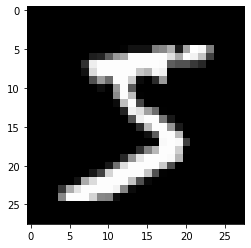

In [7]:
plt.imshow(X_train[0],cmap='gray')
print('이 이미지의 값은', y_train[0],'입니다.')

이를 통해 X의 데이터와 y의 데이터가 어떻게 되어있는지 확인하였습니다.   
이제 X의 데이터의 이미지가 실제 값인 y의 값으로 인식이 되도록 해야하는 데이터임을 알게 되었습니다.



In [8]:
def train_mnist_model():
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    '''
    print(X_train, '\n','--'*2,'\n' ,y_train)
    print(X_train[0])  # 이미지데이터
    print(y_train[0])  # 이미지의 숫자
    print('X_train shape = ',X_train.shape)
    print('y_train shape = ',y_train.shape)
    print('X_test shape = ',X_test.shape)
    print('y_test shape = ',y_test.shape)
    plt.imshow(X_train[0],cmap='gray')
    print('이 이미지의 값은', y_train[0],'입니다.')
    '''

- 여기까지 데이터 로딩 및 이해였습니다.

---------------

#### X데이터를 3차원 데이터로 reshape
CNN의 foramt에 맞추기 위해서 3차원으로 바꿔야 합니다.  
(가로, 세로, 채널) => 3차원  
이 차원은 2차원이기 때문에 channel 1을 추가하여 3차원으로 바꾸어 줍니다..   
(RGB 데이터라면 channel이 3개이므로 28,28,3로 표현합니다.)

In [9]:
X_train = X_train.reshape(60000,28,28,1) 
X_test = X_test.reshape(10000,28,28,1)

### softmax
- Multi-Class Classification으로 output 값을 나타냅니다.  
  
- output이 0부터 9까지 숫자로 총 10개의 노드이기때문에(Multi-Class output)     
  softmax를 사용해야 합니다.
  
- 이를 위해서 y값을 one-hot encoding 표현법으로 변환 합니다.
  
###### one-hot encoding
만약   
y값이 1 : 0, 1, 0, 0, 0, 0, 0, 0, 0, 0  
y값이 6 : 0, 0, 0, 0, 0, 0, 1, 0, 0, 0  
0부터 9까지 10개의 노드에서  
각 값에 해당하는 노드는 1, 나머지는 0 할당하는 것입니다.  

In [10]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


#### 모델링
0) Input 데이터의 차원, 사이즈  

[Hidden Layer  ]  
1) Convolutional Layer  -> Conv2D(필터의 개수, 커널사이즈, 활성함수, 이름 지정 )  
2) Pooling Layer        -> MaxPooling2D  
3) Full Conected Layer (여기서는 생략하여 차원을 축소시키는 Flatten을 사용했습니다.)     
  
4) Softmax Layer        -> Dense(outlayer 노드수,  활성함수 = 'softmax')  
  
이렇게 모델링을 진행했습니다.    
(딥러닝에서 히든레이어에 따라 복잡도가 달라지므로   
이론적, 경험적 지식을 쌓아 최선의 방법을 찾아 가야 합니다!  )    
con2D의 파라미터 개수 = n_filters * (filter_size + 1)= 32*(9+1) = 320개 

In [11]:
model = Sequential([
            Input(shape = (28,28,1), name = 'input_layer'),
            Conv2D(32,kernel_size=3, activation= 'relu', name = 'cov_layer1' ),
            #Dropout(0.5) 데이터 기반한 weight를 줄여 오버핏팅을 줄이는 것
            MaxPooling2D(pool_size= 2), 
            Flatten(), 
            Dense(10, activation= 'softmax', name = '')
            ])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cov_layer1 (Conv2D)          (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                54090     
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer= 'adam', loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(X_train,y_train, validation_data=(X_test, y_test), batch_size=10, epochs = 3)


Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 22s 375us/sample - loss: 0.4442 - accuracy: 0.9441 - val_loss: 0.1382 - val_accuracy: 0.9611
Epoch 2/3
60000/60000 [==============================] - 20s 334us/sample - loss: 0.1075 - accuracy: 0.9679 - val_loss: 0.1155 - val_accuracy: 0.9712
Epoch 3/3
60000/60000 [==============================] - 20s 327us/sample - loss: 0.0877 - accuracy: 0.9739 - val_loss: 0.1187 - val_accuracy: 0.9685


In [13]:
def plot_loss_curve(history):
    plt.figure(figsize = (5,3))
    
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['train','test'], loc = 'upper right')
    plt.show

{'loss': [0.44415029013617086, 0.10751354535827765, 0.08772805138246678], 'accuracy': [0.9441, 0.96785, 0.97385], 'val_loss': [0.13818073739786632, 0.11550658857616646, 0.11869773570185088], 'val_accuracy': [0.9611, 0.9712, 0.9685]}
train loss = 0.08772805138246678
validation loss = 0.11869773570185088
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: mnist.model\assets


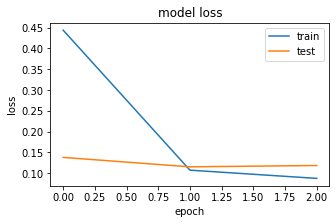

In [14]:
plot_loss_curve(history.history)
print(history.history)

print('train loss =', history.history['loss'][-1])
print('validation loss =', history.history['val_loss'][-1])

model.save('mnist.model')


----

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 17s 279us/sample - loss: 0.0615 - accuracy: 0.9823 - val_loss: 0.1082 - val_accuracy: 0.9731
Epoch 2/3
60000/60000 [==============================] - 16s 263us/sample - loss: 0.0486 - accuracy: 0.9854 - val_loss: 0.1167 - val_accuracy: 0.9747
Epoch 3/3
60000/60000 [==============================] - 17s 278us/sample - loss: 0.0418 - accuracy: 0.9879 - val_loss: 0.1319 - val_accuracy: 0.9752
{'loss': [0.06148121261714088, 0.048647613729715135, 0.04178916824188802], 'accuracy': [0.98226666, 0.98538333, 0.98785], 'val_loss': [0.10820213233468166, 0.11666784845924258, 0.1319326322514219], 'val_accuracy': [0.9731, 0.9747, 0.9752]}
train loss = 0.04178916824188802
validation loss = 0.1319326322514219
INFO:tensorflow:Assets written to: mnist.model\assets


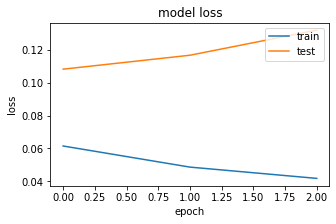

In [15]:
def plot_loss_curve(history):
    plt.figure(figsize = (5,3))
    
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['train','test'], loc = 'upper right')
    plt.show
    
def train_mnist_model():
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    X_train = X_train.reshape(60000,28,28,1) 
    X_test = X_test.reshape(10000,28,28,1)
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
#     print(y_train[1563])
    
    
    model.compile(optimizer= 'adam', loss='categorical_crossentropy',metrics=['accuracy'])
    history = model.fit(X_train,y_train, validation_data=(X_test, y_test), batch_size=20, epochs = 3)
    
    plot_loss_curve(history.history)
    print(history.history)
    print('train loss =', history.history['loss'][-1])
    print('validation loss =', history.history['val_loss'][-1])

    model.save('mnist.model')


    
if __name__ == '__main__':
    train_mnist_model()

- 이렇게해서 데이터를 로딩하고, train 모델까지 완성 했습니다.

----

- 예측 하기

In [ ]:
def predict_image_sample(model,X_test, y_test, test_id= -1 ):
    if test_id <0 :
        from random import randrange
        test_sample_id = randrange(10000)
    else:
        test_sample_id = test_id
    
    test_image =X_test[test_sample_id]
    
    
    